In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../data/train.csv")


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.00      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

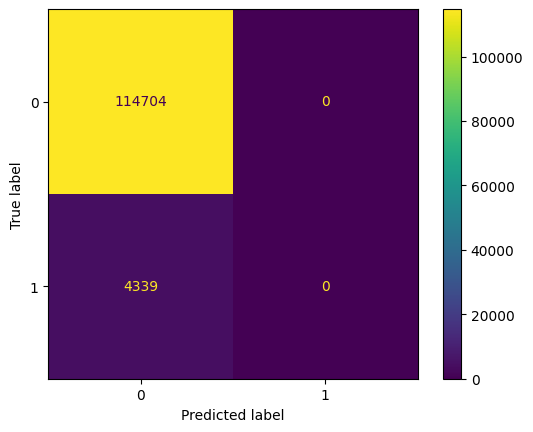

In [ ]:
# Dummy Model as Baseline --> from Robin
from sklearn.dummy import DummyClassifier

# Predict the most frequent class
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)

# Testing the baseline model
y_pred = baseline.predict(X_test)
print(classification_report(y_test, y_pred))

#Showing a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Euristic Model considering the high risk catgeories 

In [3]:
# If the customer has certain high-risk categories → we predict that they will make a claim.

def simple_heuristic_model(row):
    if (
        (row['ps_car_04_cat'] == 7) or
        (row['ps_ind_05_cat'] == 2) or
        (row['ps_car_11_cat'] == 41) or
        (row['ps_car_06_cat'] == 8) or
        (row['ps_car_06_cat'] == 2)
    ):
        return 1
    return 0


In [ ]:
# # Apply the function to each row
train['heuristic_pred'] = train.apply(simple_heuristic_model, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_true = train['target']
y_pred = train['heuristic_pred']

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# # Only if you also want the ROC-AUC
print("\nROC-AUC Score:", roc_auc_score(y_true, y_pred))


Confusion Matrix:
[[563819   9699]
 [ 20927    767]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9642    0.9831    0.9736    573518
           1     0.0733    0.0354    0.0477     21694

    accuracy                         0.9485    595212
   macro avg     0.5187    0.5092    0.5106    595212
weighted avg     0.9317    0.9485    0.9398    595212


ROC-AUC Score: 0.5092219921945018


 # Building a logistic regression model using all the variables

In [ ]:
# # Ignore id and target
exclude_cols = ['id', 'target']

# Binary columns (directly usable)
bin_cols = [col for col in train.columns if '_bin' in col]

# CCategorical columns (da one-hot encode)
cat_cols = [col for col in train.columns if '_cat' in col]

# Continuous column (to scale)
num_cols = [col for col in train.columns if col not in bin_cols + cat_cols + exclude_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler

# I request the scaler
scaler = StandardScaler()

# I apply fit + transform ONLY to numerals
X_num_scaled = scaler.fit_transform(train[num_cols])

In [ ]:
# One-hot encoding of the categorical ones (we avoid the dummy trap by removing the first level)
X_cat_encoded = pd.get_dummies(train[cat_cols], drop_first=True)

In [ ]:
import numpy as np
import pandas as pd

# Let's convert the scaled numpy array back into a dataframe, with the original names.
X_num_df = pd.DataFrame(X_num_scaled, columns=num_cols, index=train.index)

# Concatenation: numeric + categorical + binary
X_final = pd.concat([X_num_df, X_cat_encoded, train[bin_cols]], axis=1)

# Target
y = train['target']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# SLet's divide into training e test set
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# Let's initialise the model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear è robusto per dataset sbilanciati

# We train the model
log_reg.fit(X_train, y_train)

# Previsions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # probabilità che sia classe 1

# Assessment
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[114704      0]
 [  4339      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.00      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043


ROC-AUC Score: 0.6223726295430079


/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

# Building a KNN model with k = 5

In [ ]:
# KNN k=5 with only numerical features

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset from the correct path
train = pd.read_csv("../data/train.csv")

# Separate target e feature
y = train['target']
X = train.drop(columns=['id', 'target'])

# Select only the numeric columns (in this dataset, they are all float64)
X_numerical = X.select_dtypes(include=['float64', 'int64'])

# Divide into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_numerical, y, test_size=0.2, random_state=42, stratify=y)

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and train KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate the performance
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n🎯 ROC-AUC Score: {roc_auc:.4f}")


📊 Confusion Matrix:
[[114635     69]
 [  4332      7]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.09      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.53      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043


🎯 ROC-AUC Score: 0.5127


# Building a KNN with k=5 and SMOTE 

In [ ]:
#KNN k=5 + SMOTE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Load the dataset
train = pd.read_csv("../data/train.csv")

# 2. Select numerical variables (exclude binary, categorical, target)
num_features = train.select_dtypes(include=["float64", "int64"]).columns
num_features = [f for f in num_features if "bin" not in f and "cat" not in f and f != "target"]

X = train[num_features]
y = train["target"]

# 3. Handle missing values (-1 treated as NaN → median)
X = X.replace(-1, np.nan)
X = X.fillna(X.median())

# 4. Scale numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 6. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 7. KNN classifier con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. Predictions and assessment
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n🎯 ROC-AUC Score: {roc_auc:.4f}")


📊 Confusion Matrix:
[[ 74429  40486]
 [     0 114493]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    114915
           1       0.74      1.00      0.85    114493

    accuracy                           0.82    229408
   macro avg       0.87      0.82      0.82    229408
weighted avg       0.87      0.82      0.82    229408


🎯 ROC-AUC Score: 0.9479


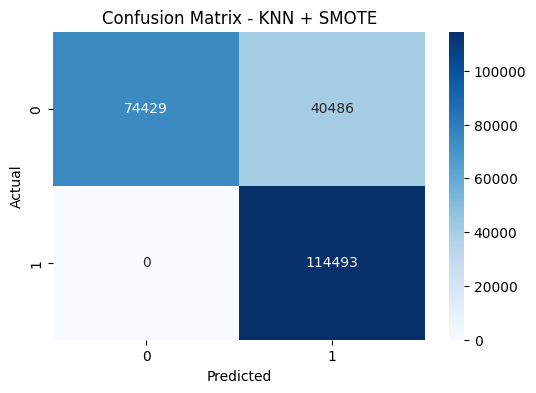

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN + SMOTE')
plt.show()


In [ ]:
# Random Forest withiut SMOTE using all the variables and no scaling

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# 1. load the dataset
train = pd.read_csv("../data/train.csv")

# 2. Separation of features and target
X = train.drop(columns=['id', 'target'])
y = train['target']

# 3. Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Initialise and train Random Forest
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    class_weight='balanced',  # manages imbalance
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 5. Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# 6. Model evaluation
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"\n🎯 ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


📊 Confusion Matrix:
[[114704      0]
 [  4339      0]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.00      0.00      0.00      4339

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043


🎯 ROC-AUC Score: 0.5799


/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [28]:
# Random Forest with modified parameters and without SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
import pandas as pd
train = pd.read_csv("../data/train.csv")

# Separation features e target
X = train.drop(columns=["id", "target"])
y = train["target"]

# Initialising model with modified parameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training
rf_model.fit(X, y)

# Predictions
y_pred = rf_model.predict(X)

# Assessment
print("📊 Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y, y_pred))

print("\n🎯 ROC-AUC Score:", roc_auc_score(y, rf_model.predict_proba(X)[:,1]))


📊 Confusion Matrix:
[[416076 157442]
 [  8997  12697]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83    573518
           1       0.07      0.59      0.13     21694

    accuracy                           0.72    595212
   macro avg       0.53      0.66      0.48    595212
weighted avg       0.95      0.72      0.81    595212


🎯 ROC-AUC Score: 0.7181619733180851


In [16]:
# Random Forest tuned like before and with SMOTE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df = pd.read_csv("../data/train.csv")

df = df.drop("id", axis=1)

X = df.drop("target", axis=1)
y = df["target"]

# We apply SMOTE ONLY to the training set (after splitting).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Instantiate the model with selected parameters
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model on SMOTE data
rf.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n🎯 ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.4f}")


📊 Confusion Matrix:
[[113045   1659]
 [  4235    104]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    114704
           1       0.06      0.02      0.03      4339

    accuracy                           0.95    119043
   macro avg       0.51      0.50      0.50    119043
weighted avg       0.93      0.95      0.94    119043


🎯 ROC-AUC Score: 0.5637


In [20]:
pip install xgboost


  Using cached xgboost-3.0.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-macosx_12_0_arm64.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# XGBoost without SMOTE and using scale_pos_weight to manage the unbalanced dataset
# scale_pos_weight = numero_negativi / numero_positivi
# In an unbalanced dataset (such as ours, where class 1 is very rare), the model tends to predict the majority class (0) almost all the time.
# The scale_pos_weight parameter serves to give more "weight" to errors made on the minority class (1) during training.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

df = pd.read_csv("../data/train.csv")

# 🔹 features / target
X = df.drop(columns=['id', 'target'])
y = df['target']

# 🔹 Column identification
binary_cols = [col for col in X.columns if '_bin' in col]
categorical_cols = [col for col in X.columns if '_cat' in col]
numeric_cols = [col for col in X.columns if col not in binary_cols + categorical_cols]

# 🔹 Preprocessing
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
], remainder="passthrough")

# 🔹 Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🔹 Calcolate scale_pos_weight
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos

# 🔹 Pipeline with XGBoost
clf = Pipeline([
    ("preprocessing", preprocessor),
    ("xgb", XGBClassifier(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

# 🔹 Training
clf.fit(X_train, y_train)

# 🔹 Assessment
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🎯 ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 4))


/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:25:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Confusion Matrix:
[[73383 41321]
 [ 1911  2428]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.64      0.77    114704
           1       0.06      0.56      0.10      4339

    accuracy                           0.64    119043
   macro avg       0.52      0.60      0.44    119043
weighted avg       0.94      0.64      0.75    119043


🎯 ROC-AUC Score: 0.6391


In [ ]:
# XGBoost with parameter tuning and scale_pos_weight 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np

df = pd.read_csv("../data/train.csv")

# Remove ID
df = df.drop(columns=['id'])

# DDivide the features and the target audience
X = df.drop("target", axis=1)
y = df["target"]

# Encode categorical, if any
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Calcolate scale_pos_weight (useful for unbalanced datasets)
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


scale_pos_weight: 26.44


In [ ]:
# Initialise the classifier with basic tuning
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    use_label_encoder=False,
    random_state=42
)

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n🎯 ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Confusion Matrix:
[[75227 39477]
 [ 2014  2325]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.78    114704
           1       0.06      0.54      0.10      4339

    accuracy                           0.65    119043
   macro avg       0.51      0.60      0.44    119043
weighted avg       0.94      0.65      0.76    119043


🎯 ROC-AUC Score: 0.6351


In [ ]:
# XGboost wth SMOTE and without scale pos_weight

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


df = pd.read_csv("../data/train.csv")

# 2. Remove ID 
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# 3. Separation feature / target
X = df.drop("target", axis=1)
y = df["target"]

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 6. Define and train XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train_smote, y_train_smote)

# 7 Previsioni
y_pred = xgb.predict(X_test)

# 8. Evaluation
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🎯 ROC-AUC Score:", round(roc_auc_score(y_test, y_pred), 4))


📊 Confusion Matrix:
[[114469    235]
 [  4321     18]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114704
           1       0.07      0.00      0.01      4339

    accuracy                           0.96    119043
   macro avg       0.52      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043


🎯 ROC-AUC Score: 0.501


In [ ]:
# KNN k=5 + split train and test and then SMOTE on train set

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Load the dataset
train = pd.read_csv("../data/train.csv")

# 2. Select numerical variables (exclude binary, categorical, target)
num_features = train.select_dtypes(include=["float64", "int64"]).columns
num_features = [f for f in num_features if "bin" not in f and "cat" not in f and f != "target"]

X = train[num_features]
y = train["target"]

# 3. Handle missing values (-1 treated as NaN → median)
X = X.replace(-1, np.nan)
X = X.fillna(X.median())

# 4. Scale numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split train/test BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 6. Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 7. Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# 8. Predictions and assessment
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n🎯 ROC-AUC Score: {roc_auc:.4f}")



📊 Confusion Matrix:
[[76972 37732]
 [ 2768  1571]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79    114704
           1       0.04      0.36      0.07      4339

    accuracy                           0.66    119043
   macro avg       0.50      0.52      0.43    119043
weighted avg       0.93      0.66      0.77    119043


🎯 ROC-AUC Score: 0.5212


In [ ]:
# Ensemble Learning with VotingClassifier without weights (KNN + RF + XGBoost) using Stratified Train/Test Split and SMOTE on Train



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df = pd.read_csv("../data/train.csv")

X = df.drop(columns=["target"])
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# SMOTE training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# # Definition of individual models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                    subsample=0.8, colsample_bytree=0.8,
                    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
                    use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('xgb', xgb)],
    voting='soft'  # usa le probabilità
)

# # Fit on data with SMOTE
X_train_np = X_train_smote.values.copy()
X_test_np = X_test[X_train_smote.columns].values.copy()
y_train_np = y_train_sm.values.copy()


voting_clf.fit(X_train_np, y_train_np)
y_pred = voting_clf.predict(X_test_np)
y_proba = voting_clf.predict_proba(X_test_np)[:, 1]


# VModel evaluation
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"\n🎯 ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:00:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Confusion Matrix:
[[91245 23459]
 [ 3154  1185]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87    114704
           1       0.05      0.27      0.08      4339

    accuracy                           0.78    119043
   macro avg       0.51      0.53      0.48    119043
weighted avg       0.93      0.78      0.84    119043


🎯 ROC-AUC Score: 0.5580


In [ ]:
## Ensemble Learning with VotingClassifier with weights (KNN + RF + XGBoost) using Stratified Train/Test Split and SMOTE on Train

# 📦 Importa librerie
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 📥 Carica i dati
df = pd.read_csv("../data/train.csv")

X = df.drop(columns=["target"])
y = df["target"]

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 🔄 Applica SMOTE solo sul training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 🤖 Definizione dei modelli individuali
knn = KNeighborsClassifier(n_neighbors=5)

rf = RandomForestClassifier(
    n_estimators=100, max_depth=15, min_samples_split=5, random_state=42
)

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 🗳️ Voting Classifier con pesi [KNN=1, RF=3, XGB=2]
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('xgb', xgb)],
    voting='soft',
    weights=[1, 3, 2]
)

# 🧠 Fit sui dati con SMOTE
X_train_np = X_train_sm.values.copy()
X_test_np = X_test[X_train_sm.columns].values.copy()
y_train_np = y_train_sm.values.copy()

voting_clf.fit(X_train_np, y_train_np)

# 🔍 Valutazione
y_pred = voting_clf.predict(X_test_np)
y_proba = voting_clf.predict_proba(X_test_np)[:, 1]

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n🎯 ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


/Users/lucat84/Desktop/Aipm/group-ml-porto-seguro/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:34:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Confusion Matrix:
[[108456   6248]
 [  3935    404]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    114704
           1       0.06      0.09      0.07      4339

    accuracy                           0.91    119043
   macro avg       0.51      0.52      0.51    119043
weighted avg       0.93      0.91      0.92    119043


🎯 ROC-AUC Score: 0.5684
